<a href="https://colab.research.google.com/github/jannatulfarzana/wineQuality_prediction/blob/main/wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

wine_data= pd.read_csv('/content/drive/MyDrive/wine.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [17]:
wine_data.shape

(1599, 12)

In [18]:
#checking if there is any nan values
wine_data.isnull().sum()   #no nan values

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [20]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [19]:
#for encoding
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [21]:
#encode categorical features
# Encode-01
# built-in class



# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
wine_data['quality_enc'] = enc.fit_transform(wine_data['quality'])

# Compare the two columns
print(wine_data[['quality','quality_enc']].head(12))

   quality  quality_enc
0      bad            0
1      bad            0
2      bad            0
3     good            1
4      bad            0
5      bad            0
6      bad            0
7     good            1
8     good            1
9      bad            0
10     bad            0
11     bad            0


In [22]:
#Scaling features
col = wine_data.select_dtypes(include = 'float64').columns
scaler = MinMaxScaler()
scaled_data = wine_data.loc[:, col]
scaled_data = pd.DataFrame(scaler.fit_transform(scaled_data))
scaled_data.columns = col
scaled_data.head(10)
#scaled_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846
6,0.292035,0.328767,0.06,0.047945,0.095159,0.197183,0.187279,0.464758,0.440945,0.077844,0.153846
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154
8,0.283186,0.315068,0.02,0.075342,0.101836,0.112676,0.042403,0.494126,0.488189,0.143713,0.169231
9,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.339223,0.567548,0.480315,0.281437,0.323077


In [23]:
#spiliting label and features
#features_list = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
x_data =scaled_data #x_data=features
y_data =wine_data[['quality_enc']]  #y_data=features
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.2,random_state=1)
print(X_train.shape)
print(X_test.shape)

#y_train
#x_data
#y_data

(1279, 11)
(320, 11)


In [24]:
# Import the dependencies for logistic regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [25]:
#Train the model
model = LogisticRegression()
model.fit(X_train, y_train) #Training the model
predictions = model.predict(X_test)
print(predictions)# printing predictions

[1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0
 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1
 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1
 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0
 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0
 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0
 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1
 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:

lr_accuracy= accuracy_score(y_test, predictions)
lr_accuracy

0.74375

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [36]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
dec_treescore=accuracy_score(y_pred,y_test)
print(dec_treescore)

0.753125


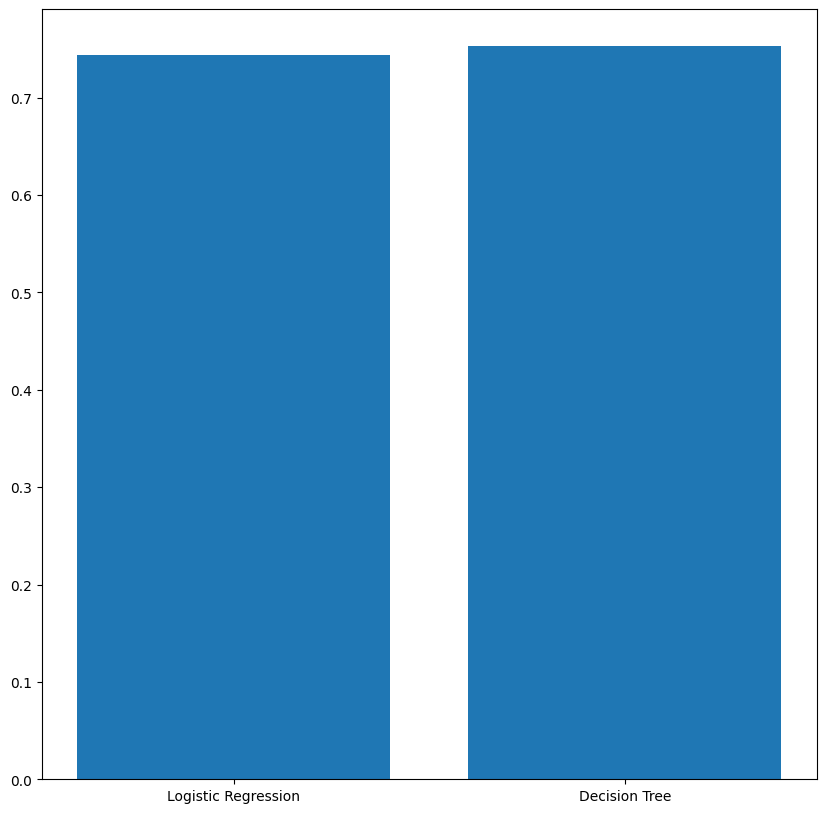

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
classifiers = ['Logistic Regression', 'Decision Tree']
accuracy= [lr_accuracy, dec_treescore]
plt.bar(classifiers, accuracy)
plt.show()

In [37]:


import numpy as np

# Example new wine data
new_wine = np.array([[7.4, 0.7, 0, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4]])  # Example values

# Scale the new data using the same scaler used during training
new_wine_scaled = scaler.transform(new_wine)

# Predict the quality of the new wine
quality_prediction = clf.predict(new_wine_scaled)

# Categorize the predicted quality as 'Good' or 'Bad'
if quality_prediction[0] >= 1:
    quality_label = 'Good Quality'
else:
    quality_label = 'Bad Quality'

# Print the predicted quality and the category label
#print(f'Predicted Quality: {quality_prediction[0]} ({quality_label})')
print(f'Predicted Quality: {quality_prediction[0]}\nQuality Label: {quality_label}')

Predicted Quality: 0
Quality Label: Bad Quality


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
